In [4]:
import open3d as o3d
import numpy as np
import os
import data_process
import cv2


In [5]:
# ############################################ Using Open3D ###################################################
# BASE_PATH = '/media/chris/Workspace/Dataset/3d-object-detection-for-autonomous-vehicles/kitti_format'

# def load_bin_file(bin_file_path):
#     # 读取 bin 文件为 numpy 数组
#     point_cloud_data = np.fromfile(bin_file_path, dtype=np.float32)

#     # 将一维数组转换为 Nx3 的二维数组
#     point_cloud_data = point_cloud_data.reshape(-1, 3)

#     # 将 numpy 数组转换为 Open3D 的 PointCloud 对象
#     point_cloud = o3d.geometry.PointCloud()
#     point_cloud.points = o3d.utility.Vector3dVector(point_cloud_data)

#     return point_cloud
# # os.path.join(BASE_PATH, 'velodyne/0.bin')
# # os.path.join(BASE_PATH, 'velodyne/0.bin'),
# pc_file_path = os.path.join(BASE_PATH,'/training/velodyne/0.bin')
# print(pc_file_path)
# point_cloud = load_bin_file('/media/chris/Workspace/Dataset/3d-object-detection-for-autonomous-vehicles/kitti_format/training/velodyne/0.bin')

# o3d.visualization.draw_geometries([point_cloud])


BASE_PATH = '/media/chris/Workspace/Dataset/3d-object-detection-for-autonomous-vehicles/kitti_format/training'
def read_point_cloud():
    point_cloud = np.fromfile(os.path.join(BASE_PATH, 'velodyne/0.bin'), dtype=np.float32).reshape(-1,4)
    return point_cloud

point_cloud = read_point_cloud

### Visualize the point cloud

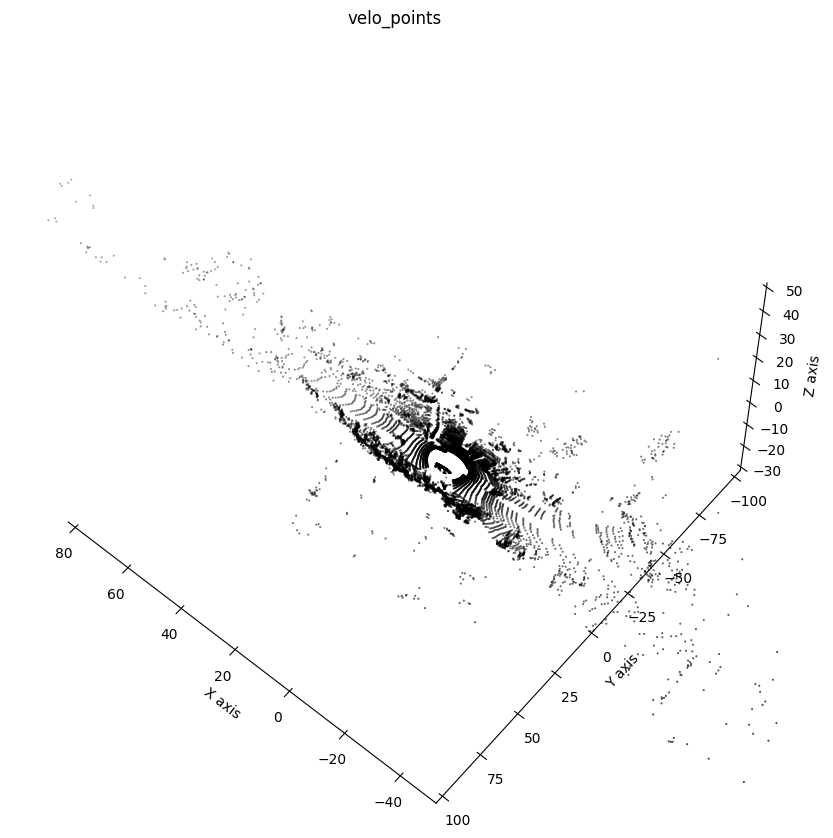

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw_point_cloud(ax, points, title, axes=[0, 1, 2], point_size=0.2, xlim3d=None, ylim3d=None, zlim3d=None):
    """
    Convenient method for drawing various point cloud projections as a part of frame statistics.
    """
    # 设置xyz三个轴的点云范围
    axes_limits = [
        [-50, 80], # X axis range
        [-100, 100], # Y axis range
        [-30, 50]    # Z axis range
    ]
    axes_str = ['X', 'Y', 'Z']
    # 禁止显示背后的网格
    ax.grid(False)
    # 创建散点图[1]:xyz数据集，[2]:点云的大小，[3]:点云的反射率数据,[4]:为灰度显示
    ax.scatter(*np.transpose(points[:, axes]), s=point_size, c=points[:, 3], cmap='gray')
    # 设置画板的标题
    ax.set_title(title)
    # 设置x轴标题
    ax.set_xlabel('{} axis'.format(axes_str[axes[0]]))
    # 设置y轴标题
    ax.set_ylabel('{} axis'.format(axes_str[axes[1]]))
    if len(axes) > 2:
        # 设置限制角度
        ax.set_xlim3d(*axes_limits[axes[0]])
        ax.set_ylim3d(*axes_limits[axes[1]])
        ax.set_zlim3d(*axes_limits[axes[2]])
        # 将背景颜色设置为RGBA格式，目前的参数以透明显示
        ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
        # 设置z轴标题
        ax.set_zlabel('{} axis'.format(axes_str[axes[2]]))
    else:
        # 2D限制角度，只有xy轴
        ax.set_xlim(*axes_limits[axes[0]])
        ax.set_ylim(*axes_limits[axes[1]])
    # User specified limits
    if xlim3d!=None:
        ax.set_xlim3d(xlim3d)
    if ylim3d!=None:
        ax.set_ylim3d(ylim3d)
    if zlim3d!=None:
        ax.set_zlim3d(zlim3d)

# 获取数据集中的点云数据
point_cloud = read_point_cloud()
# 绘制3D点云数据，创建一个大小为20*10的图形画板
fig = plt.figure(figsize=(20, 10))
# 在画板中添加1*1的网格的第一个子图，为3D图像
ax = fig.add_subplot(111, projection='3d')
# 改变绘制图像的视角，即相机的位置，elev为Z轴角度，azim为(x,y)角度
ax.view_init(60,130)
# 在画板中画出点云显示数据，point_cloud[::x]x值越大，显示的点越稀疏
draw_point_cloud(ax, point_cloud[::5], "velo_points")

In [7]:
import pandas as pd 
LABEL_NAME = ["type", "truncated", "occluded", "alpha", "bbox_left", "bbox_top", "bbox_right", "bbox_bottom", "dimensions_height", "dimensions_width", "dimensions_length", "location_x", "location_y", "location_z", "rotation_y","confidence"] 
df = pd.read_csv(os.path.join(BASE_PATH, "label_2/0.txt"), header=None, sep=" ")
print(type(df))
df.columns = LABEL_NAME
df.loc[df.type.isin(['van','car','truck']),'type'] = 'car'
df

<class 'pandas.core.frame.DataFrame'>


,type,truncated,occluded,alpha,bbox_left,bbox_top,bbox_right,bbox_bottom,dimensions_height,dimensions_width,dimensions_length,location_x,location_y,location_z,rotation_y,confidence
0,pedestrian,0.0,0,-10.0,-1.00,-1.00,-1.00,-1.00,1.4,0.74,0.85,6.57,1.20,-1.76,3.14,0.0
1,car,0.0,0,-10.0,-1.00,-1.00,-1.00,-1.00,1.6,1.84,4.52,17.68,0.48,-34.54,-3.12,0.0
2,car,0.0,0,-10.0,-1.00,-1.00,-1.00,-1.00,1.7,1.84,4.05,23.77,0.36,-34.39,-3.13,0.0
3,car,0.0,0,-10.0,-1.00,-1.00,-1.00,-1.00,1.5,1.81,4.54,11.68,0.76,-32.32,-2.86,0.0
4,car,0.0,0,-10.0,-1.00,-1.00,-1.00,-1.00,1.8,2.01,6.26,-0.14,1.40,-17.90,-1.57,0.0
5,pedestrian,0.0,0,-10.0,-1.00,-1.00,-1.00,-1.00,1.7,0.71,0.71,6.40,1.14,-0.69,1.57,0.0
6,car,0.0,0,-10.0,308.92,520.99,472.39,639.47,1.8,1.84,4.50,-3.98,1.81,15.78,1.54,0.0
7,car,0.0,0,-10.0,-1.00,-1.00,-1.00,-1.00,1.9,1.97,4.89,-4.52,1.81,-0.05,1.49,0.0


In [8]:
df.loc[6,['bbox_left','bbox_top','bbox_right','bbox_bottom']]

bbox_left      308.92
bbox_top       520.99
bbox_right     472.39
bbox_bottom    639.47
Name: 6, dtype: object

In [9]:
# box = np.array(df.loc[6,['bbox_left','bbox_top','bbox_right','bbox_bottom']]) 
# import cv2
# # 读取第一帧图片
# img = cv2.imread(BASE_PATH+"/image_2/0.png")
# # 左上角顶点坐标
# left_point = (int(box[0]),int(box[1]))
# # 右下角顶点坐标
# right_point = (int(box[2]),int(box[3]))
# # 画出car的检测框，蓝色，2mm宽度
# cv2.rectangle(img,left_point,right_point,(255,0,0),2)
# cv2.imshow("img",img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [10]:
lidar_path = os.path.join(BASE_PATH, 'velodyne', f'{0}.bin')
calib_path = os.path.join(BASE_PATH, 'calib', f'{0}.txt') 
img_path = os.path.join(BASE_PATH, 'image_2', f'{0}.png')

# 读取点云数据
init_points = data_process.get_lidar_points(lidar_path)  # N by 4 matrix
# 读取标定数据并处理
calib_dict = data_process.process_calibration(calib_path)
# 读取图像
cur_img = cv2.imread(img_path)

In [11]:
# def remove_outside_pointcloud(pointcloud,calib_dict,img_shape):
#     R0_rect = calib_dict['R0_rect']
#     Tr_lidar_to_cam = calib_dict['Tr_lidar_to_cam']
#     P2 = calib_dict['P2']

#     # 分解矩阵
#     # C相机内参，R相机参考帧的世界坐标轴方向，T世界坐标系中的相机中心坐标
#     C, R, T = data_process.projection_matrix_to_CRT(P2)
#     img_box = [0,0,img_shape[1],img_shape[0]]   # 图像大小范围构成
#     frustum = data_process.get_frustum(img_box,C)
#     frustum -= T
#     frustum = np.linalg.inv(R) @ frustum.T  # 3xN

#     # 将视锥体从相机坐标变换为激光雷达坐标
#     # frustum = np.hstack((frustum.T, np.ones((frustum.shape[1],1))))
#     frustum = np.pad(frustum.T[None, ...], ((0, 0), (0, 0), (0, 1)), 'constant', constant_values=1.0)
#     # Tr_lidar_to_cam transforms LiDAR points to the camera coordinate system,
#     #  and R0_rect aligns the different camera coordinate systems.
#     rotation_matrix = np.linalg.inv(R0_rect @ Tr_lidar_to_cam)
#     frustum = frustum @ rotation_matrix.T
#     frustum = frustum[...,:3]  # 仅保留xyz

#     group_rectangle_vertexs_v = data_process.group_rectangle_vertexs(frustum)
#     frustum_surfaces = data_process.group_plane_equation(group_rectangle_vertexs_v)
#     indices = data_process.points_in_bboxes(pointcloud[:, :3], frustum_surfaces) # (N, 1)
#     pointcloud = pointcloud[indices.reshape([-1])]

#     return pointcloud

# def points_lidar2image(points, tr_velo_to_cam, r0_rect, P2):
#     '''
#     points: shape=(N, 8, 3) 
#     tr_velo_to_cam: shape=(4, 4)
#     r0_rect: shape=(4, 4)
#     P2: shape=(4, 4)
#     return: shape=(N, 8, 2)
#     '''
#     # points = points[:, :, [1, 2, 0]]
#     extended_points = np.pad(points, ((0, 0), (0, 0), (0, 1)), 'constant', constant_values=1.0) # (N, 8, 4)
#     rt_mat = r0_rect @ tr_velo_to_cam
#     camera_points = extended_points @ rt_mat.T # (N, 8, 4)
#     # camera_points = camera_points[:, :, [1, 2, 0, 3]]
#     image_points = camera_points @ P2.T # (N, 8, 4)
#     image_points = image_points[:, :, :2] / image_points[:, :, 2:3]

#     return image_points

In [12]:
# reduced_lidar_points = remove_outside_pointcloud(init_points,calib_dict,cur_img.shape[:2])
# reduced_lidar_points

# 将图像的box投影到激光雷达坐标系中
def bbox_camera2lidar(bboxes, Tr_lidar_to_cam, r0_rect):
    '''
    bboxes: shape=(N, 7)
    Tr_lidar_to_cam: shape=(4, 4)
    r0_rect: shape=(4, 4)
    return: shape=(N, 7)
    '''
    x_size, y_size, z_size = bboxes[:, 3:4], bboxes[:, 4:5], bboxes[:, 5:6]
    xyz_size = np.concatenate([z_size, x_size, y_size], axis=1)
    print(bboxes[:, :3])
    extended_xyz = np.pad(bboxes[:, :3], ((0, 0), (0, 1)), 'constant', constant_values=1.0)
    print(extended_xyz)
    rt_mat = np.linalg.inv(r0_rect @ Tr_lidar_to_cam)
    xyz = extended_xyz @ rt_mat.T
    bboxes_lidar = np.concatenate([xyz[:, :3], xyz_size, bboxes[:, 6:]], axis=1)
    return np.array(bboxes_lidar, dtype=np.float32)

def points_in_bboxes_v2(points, r0_rect, Tr_lidar_to_cam, dimensions, location, rotation_y, name, bbox):
    '''
    points: shape=(N, 4) 
    Tr_lidar_to_cam: shape=(4, 4)
    r0_rect: shape=(4, 4)
    dimensions: shape=(n, 3) 
    location: shape=(n, 3) 
    rotation_y: shape=(n, ) 
    name: shape=(n, )
    return:
        indices: shape=(N, n_valid_bbox), indices[i, j] denotes whether point i is in bbox j. 
        n_total_bbox: int. 
        n_valid_bbox: int, not including 'DontCare' 
        bboxes_lidar: shape=(n_valid_bbox, 7) 
        name: shape=(n_valid_bbox, )
    '''
    n_total_bbox = len(dimensions)
    n_valid_bbox = len([item for item in name if item != 'DontCare'])

    # valid_rows_index = np.where(np.all(bbox != -1, axis=1))[0]
    valid_rows_index = np.all(bbox != -1, axis=1)
    n_valid_bbox = sum(valid_rows_index)
    print(n_valid_bbox)
    location, dimensions = location[valid_rows_index], dimensions[valid_rows_index]
    rotation_y, name = rotation_y[valid_rows_index], name[valid_rows_index]
    bboxes_camera = np.concatenate([location, dimensions, rotation_y[:, None]], axis=1)
    print(bboxes_camera)
    bboxes_lidar = bbox_camera2lidar(bboxes_camera, Tr_lidar_to_cam, r0_rect)
    bboxes_corners = data_process.bbox3d2corners(bboxes_lidar)
    group_rectangle_vertexs_v = data_process.group_rectangle_vertexs(bboxes_corners)
    frustum_surfaces = data_process.group_plane_equation(group_rectangle_vertexs_v)
    indices = data_process.points_in_bboxes(points[:, :3], frustum_surfaces) # (N, n), N is points num, n is bboxes number
    # print(indices)
    return indices, n_total_bbox, n_valid_bbox, bboxes_lidar, name

In [13]:
label_path = os.path.join(BASE_PATH, 'label_2', f'{0}.txt')
            # 读取标签中的信息，包括遮掩，box位置、截断
annotation_dict = data_process.read_label(label_path)

indices, n_total_bbox, n_valid_bbox, bboxes_lidar, name = \
                    points_in_bboxes_v2(
                        points=init_points,
                        r0_rect=calib_dict['R0_rect'].astype(np.float32), 
                        Tr_lidar_to_cam=calib_dict['Tr_lidar_to_cam'].astype(np.float32),
                        dimensions=annotation_dict['dimensions'].astype(np.float32),
                        location=annotation_dict['location'].astype(np.float32),
                        rotation_y=annotation_dict['rotation_y'].astype(np.float32),
                        name=annotation_dict['name'],
                        bbox = annotation_dict['bbox']
                    )

1
[[-3.98  1.81 15.78  4.5   1.8   1.84  1.54]]
[[-3.98  1.81 15.78]]
[[-3.98  1.81 15.78  1.  ]]
